In [1]:
%matplotlib widget
import pyvisa
import matplotlib.pyplot as plt
import numpy as np
import NA_N9916A
import time
from scipy.optimize import curve_fit


import sys 
sys.path.insert(1, 'C:\\Users\\oper\\SynologyDrive\\Lab2023\\Qubit\\QTLab2324\\PAandQubit\\Exercises_data')
sys.path.insert(2, r'C:\Users\oper\SynologyDrive\Lab2023\KIDs\QTLab2324\PAandQubit\Actual_Work')
sys.path.insert(3, r'C:\Users\oper\SynologyDrive\Lab2023\KIDs\QTLab2324\PAandQubit\Instruments\network\RS_Signal_Generator')
from FunFit import *
import Tuls as Ts
import RS_SMA100B

ip_sg           = '192.168.40.15' 
ip_vna          = '192.168.40.10' 
vna             = NA_N9916A.N9916A(ip = ip_vna)
sGen            = RS_SMA100B.SMA100B(ip = ip_sg)

N9916A:	Connection successful!
SMA100B:	Connection successful!


In [5]:
f0 = vna.get_freqs()
f0 = np.mean(np.array([int(i) for i in f0.split(',')]))

mode        = 'NA'              
s_par       = 'S21'       
f_span      = 1
f_center    = f0
bw          = 10e3            # IF BANDWIDTH
n_avgs      = 1
n_pts       = 600   
                            
###############################

vna.set_num_pts(n_pts)
vna.set_freq_bandwidth(bw)
vna.set_freq_span(f_span)
vna.set_freq_center(f_center)
vna.num_avgs(n_avgs)
vna.set_scaling(auto = True)

In [7]:
f_center

7579037687.001667

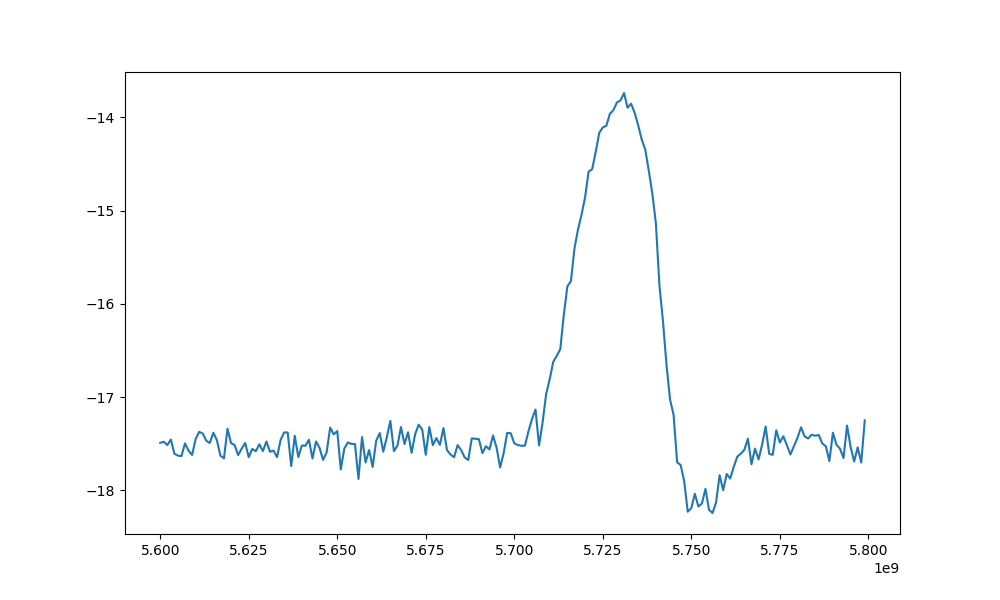

In [6]:
f_sg_min = 5.6e9
f_sg_max = 5.8e9
lvl_sg   = -30
step     = 1e6

freqs_sg = np.arange(f_sg_min, f_sg_max, step)
sGen.RF_state(1)
sGen.RF_lvl_ampl(lvl_sg)

amplitude = []

for f in freqs_sg:
    sGen.RF_freq(f)
    time.sleep(1)
    data = vna.get_data()
    amp = np.mean(5*np.log10(data['Q']**2 + data['I']**2))
    amplitude.append(amp)

sGen.RF_state(0)
amplitude = np.array(amplitude)

fig = plt.figure(figsize = (10,6))
plt.plot(freqs_sg, amplitude)
plt.show()

In [11]:
dict = {'q_spec': amplitude,
        'parameters': 'attenuatore: 10dBm\natt_power_combiner:  3.4dBm\nfreq_dressed:   7579037687Hz\npower_vna:    -40dBm\npower_sg:   -30dBm'
}
Ts.save_dict_to_hdf5(data = dict, hdf5_file = 'q_spec_200624.h5')